## 문제 01 유형(DataSet_01.csv 이용)

## 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자 한다.

In [1]:
import pandas as pd
# pandas, scipy, numpy, sklearn, statsmodels

In [2]:
data = pd.read_csv('DataSet/DataSet_01.csv')

data

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


### 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가?<br>(답안 예시) 23

In [3]:
data.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [4]:
data.isna().sum().sum()         # 열별 결측치 수 확인

26

#### 정답 : ***26***

In [5]:
# 다른 방법
data.isna().sum(axis=1).sum()   # 행별 결측치 수 확인

26

In [6]:
data.isna().any(axis=1).sum()

26

### 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다.<br>- 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오.<br>(답안 예시) 0.1234

In [7]:
# 데이터 종류 수치형
Q2 = data[['TV', 'Radio', 'Social_Media', 'Sales']].corr().round(4)

Q2

,TV,Radio,Social_Media,Sales
TV,1.0000,0.8695,0.5282,0.9995
Radio,0.8695,1.0000,0.6075,0.8691
Social_Media,0.5282,0.6075,1.0000,0.5289
Sales,0.9995,0.8691,0.5289,1.0000


In [8]:
Q2_abs = Q2.abs()   # 음수 고려할 경우

Q2_abs['Sales'].nlargest(2)[1]

0.9995

In [9]:
# 다른 방법
Q2_abs['Sales'].sort_values(ascending=False)[1]

0.9995

#### 정답 : ***0.9995***

### 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로 기술하시오.<br>- 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리 이하는 버리고 소수점 셋째 자리까지 기술하시오.<br>(답안 예시) 0.123

In [10]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant   # add_condtant : 상수항 별도로 추가
from statsmodels.formula.api import ols         # R 기반을 그대로 사용할 수 있도록

In [11]:
data1 = data.dropna()
lm = LinearRegression(fit_intercept=True).fit(data1.drop(columns=['Influencer', 'Sales']),   # X
                                              data1.Sales)                                   # y

In [12]:
# 또는 나누어서
data1 = data.dropna()

lm = LinearRegression(fit_intercept=True)   # 절편 포함
lm.fit(data1.drop(columns=['Influencer', 'Sales']), data1.Sales)

LinearRegression()

In [13]:
dir(lm)
lm.coef_.round(3)

array([ 3.563, -0.004,  0.005])

#### 정답 : ***3.562, 0.004, -0.003***

In [14]:
# 다른 방법 1
X = data1.drop(columns=['Influencer', 'Sales'])
XX = add_constant(X)   # 절편이 있는 회귀식을 만들기 위해 상수항 추가

XX

,const,TV,Radio,Social_Media
0,1.0,16.0,6.566231,2.907983
1,1.0,13.0,9.237765,2.409567
2,1.0,41.0,15.886446,2.913410
3,1.0,83.0,30.020028,6.922304
4,1.0,15.0,8.437408,1.405998
...,...,...,...,...
4567,1.0,26.0,4.472360,0.717090
4568,1.0,71.0,20.610685,6.545573
4569,1.0,44.0,19.800072,5.096192
4570,1.0,71.0,17.534640,1.940873


In [15]:
y = data1.Sales

In [16]:
ols1 = OLS(y, X).fit()    # 상수항 미포함
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.951e+06
Date:                Tue, 24 Aug 2021   Prob (F-statistic):                        0.00
Time:                        10:57:54   Log-Likelihood:                         -11367.
No. Observations:                4546   AIC:                                  2.274e+04
Df Residuals:                    4543   BIC:                                  2.276e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TV               3.5609      0.003   1133.941      0.000       3.555       3.567
Radio           -0.0039      0.010     -0.400      0.689      -0.023       0.015
Social_Media    -0.0013      0.024     -0.054      0.957      -0.049       0.047
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.038
Skew:                          -0.001   Prob(JB):                        0.981
Kurtosis:                       3.014   Cond. No.                         35.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# 다른 방법 2
ols2 = OLS(y, XX).fit()   # 상수항 포함
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:57:54   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# 다른 방법 3
var_list = list(data1.columns[:-1])
'+'.join(var_list)

'TV+Radio+Social_Media+Influencer'

In [19]:
form = 'Sales~'+'+'.join(var_list)

In [20]:
# 소문자 ols → Numerical이 아니더라도 자동으로 인코딩
ols3 = ols('Sales ~ TV + Radio + Social_Media', data=data1).fit()

ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:57:54   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
ols4 = ols(form, data=data1).fit()

ols4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.521e+05
Date:                Tue, 24 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:57:54   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.275e+04
Df Residuals:                    4539   BIC:                         2.279e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.1033      0.130     -0.797      0.426      -0.358       0.151
Influencer[T.Mega]      0.0116      0.124      0.094      0.926      -0.232       0.255
Influencer[T.Micro]    -0.0569      0.124     -0.458      0.647      -0.300       0.187
Influencer[T.Nano]     -0.0739      0.125     -0.593      0.553      -0.318       0.170
TV                      3.5626      0.003   1050.472      0.000       3.556       3.569
Radio                  -0.0039      0.010     -0.399      0.690      -0.023       0.015
Social_Media            0.0045      0.025      0.179      0.858      -0.044       0.053
==============================================================================
Omnibus:                        0.067   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.043
Skew:                          -0.001   Prob(JB):                        0.979
Kurtosis:                       3.015   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 문제 02 유형(DataSet_02.csv 이용)

## 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자 한다.

In [22]:
import pandas as pd
import numpy as np

In [23]:
dataset2 = pd.read_csv('DataSet/DataSet_02.csv')

dataset2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### 1. 해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째 자리까지 기술하시오.<br>(답안 예시) 0.123

In [24]:
dataset2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [25]:
dataset2.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [26]:
dataset2.shape

(200, 6)

In [27]:
Q1 = pd.crosstab(index=[dataset2.Sex, dataset2.BP],
                 columns=dataset2.Cholesterol,
                 normalize=True)   # 전체 대비 확률

Q1

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

#### 정답 : ***0.105***

In [28]:
# normalize=True 안 했을 때
Q1_test = pd.crosstab(index=[dataset2.Sex, dataset2.BP],
                      columns=dataset2.Cholesterol)

Q1_test

Cholesterol  HIGH  NORMAL
Sex BP                   
F   HIGH       17      21
    LOW        14      14
    NORMAL     18      12
M   HIGH       18      21
    LOW        17      19
    NORMAL     19      10

In [29]:
# 다른 방법
Q1_pivot = pd.pivot_table(data=dataset2,
                          index=['Sex', 'BP'],
                          columns=['Cholesterol'],
                          values=['Drug'],
                          aggfunc='count') / len(dataset2)   # 피벗 테이블에는 normalize가 없음

Q1_pivot

Drug       
Cholesterol   HIGH NORMAL
Sex BP                   
F   HIGH     0.085  0.105
    LOW      0.070  0.070
    NORMAL   0.090  0.060
M   HIGH     0.090  0.105
    LOW      0.085  0.095
    NORMAL   0.095  0.050

### 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오.<br>- Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은 ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오.<br>- Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 초과는 ‘Lv4’로 변환하시오.<br>- Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을 수행하시오.<br>- 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수 가운데 가장 큰 p-value를 찾아 소수점 여섯번째 자리 이하는 버리고 소수점 다섯번째 자리까지 기술하시오.<br>(답안 예시) 3, 1.23456

In [30]:
# Tip) 변수 생성 후 Chi-Square 검정

In [31]:
import numpy as np

# 변수 변환
# np.where
# Series.cut()

In [32]:
Q2 = dataset2.copy()   # 깊은 복사

In [33]:
Q2['Age_gr'] = np.where(Q2.Age<20, '10',
                        np.where(Q2.Age<30, '20',
                                 np.where(Q2.Age<40, '30',
                                          np.where(Q2.Age<50, '40',
                                                   np.where(Q2.Age<60, '50', '60')))))

Q2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40
3,28,F,NORMAL,HIGH,7.798,drugX,20
4,61,F,LOW,HIGH,18.043,DrugY,60
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,50
196,16,M,LOW,HIGH,12.006,drugC,10
197,52,M,NORMAL,HIGH,9.894,drugX,50
198,23,M,NORMAL,NORMAL,14.020,drugX,20


In [34]:
age_gr = pd.cut(Q2.Age, [0, 20, 30, 40, 50, 60, Q2.Age.max()+1],   # 왼쪽은 미포함, 오른쪽은 포함
                right=False,
                labels=['10', '20', '30', '40', '50', '60'])

age_gr

0      20
1      40
2      40
3      20
4      60
       ..
195    50
196    10
197    50
198    20
199    40
Name: Age, Length: 200, dtype: category
Categories (6, object): ['10' < '20' < '30' < '40' < '50' < '60']

In [35]:
Q2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Age_gr'], dtype='object')

In [36]:
Q2['Na_k_gr'] = np.where(Q2['Na_to_K']<=10, 'Lv1',
                         np.where(Q2['Na_to_K']<=20, 'Lv2',
                                  np.where(Q2['Na_to_K']<=30, 'Lv3', 'Lv4')))

In [37]:
import scipy.stats as sc

In [38]:
# 입력값이 빈도 테이블로 들어가도록 변경
['Age', 'Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_k_gr', 'Drug']

Age_t = pd.crosstab(Q2.Age_gr, Q2.Drug)

Age_t

Drug,DrugY,drugA,drugB,drugC,drugX
Age_gr,,,,,
10,7,1,0,1,3
20,17,5,0,4,9
30,16,9,0,1,11
40,15,7,0,6,10
50,15,1,6,2,9
60,21,0,10,2,12


In [39]:
out_Age_t = sc.chi2_contingency(Age_t)

out_Age_t

(46.440652324723914,
 0.0007010113024729462,
 20,
 array([[ 5.46 ,  1.38 ,  0.96 ,  0.96 ,  3.24 ],
        [15.925,  4.025,  2.8  ,  2.8  ,  9.45 ],
        [16.835,  4.255,  2.96 ,  2.96 ,  9.99 ],
        [17.29 ,  4.37 ,  3.04 ,  3.04 , 10.26 ],
        [15.015,  3.795,  2.64 ,  2.64 ,  8.91 ],
        [20.475,  5.175,  3.6  ,  3.6  , 12.15 ]]))

In [40]:
print(out_Age_t[1])

0.0007010113024729462


In [41]:
Q2_temp = []
for i in ['Age', 'Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_k_gr']:
    temp = pd.crosstab(Q2[i], Q2.Drug)
    out_Age_t = sc.chi2_contingency(temp)
    print(i, ':', out_Age_t[1])
    Q2_temp = Q2_temp + [[i, out_Age_t[1]]]

Age : 0.8632632799174741
Sex : 0.7138369773987128
BP : 5.0417334144665895e-27
Cholesterol : 0.0005962588389856497
Age_gr : 0.0007010113024729462
Na_k_gr : 1.1254641594413981e-14


In [42]:
Q2_temp

[['Age', 0.8632632799174741],
 ['Sex', 0.7138369773987128],
 ['BP', 5.0417334144665895e-27],
 ['Cholesterol', 0.0005962588389856497],
 ['Age_gr', 0.0007010113024729462],
 ['Na_k_gr', 1.1254641594413981e-14]]

In [43]:
Q2_temp = pd.DataFrame(Q2_temp)
Q2_temp.columns = ['var', 'pvalues']
Q2_temp2 = Q2_temp[Q2_temp.pvalues<0.05]
len(Q2_temp2)

4

In [44]:
Q2_temp2.sort_values(by='pvalues').round(5).tail(1)

,var,pvalues
4,Age_gr,0.0007


#### 정답 : ***4, 0.00070***

### 3. Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한 분석을 수행하시오.<br>- Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성<br>- BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성<br>- Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성<br>- Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를 수행하고 Root Node의 split feature와 split value를 기술하시오. 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오.<br>(답안 예시) Age, 12.345

In [45]:
import numpy as np   # np.where
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [46]:
Q3 = dataset2.copy()

Q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [47]:
Q3['Sex_cd'] = np.where(Q3.Sex=='M', 0, 1)
Q3['BP_cd'] = np.where(Q3.BP=='LOW', 0,
                       np.where(Q3.BP=='NORMAL', 1, 2))
Q3['Ch_cd'] = np.where(Q3.Cholesterol=='NORMAL', 0, 1)

Q3

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cd,BP_cd,Ch_cd
0,23,F,HIGH,HIGH,25.355,DrugY,1,2,1
1,47,M,LOW,HIGH,13.093,drugC,0,0,1
2,47,M,LOW,HIGH,10.114,drugC,0,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,1,1,1
4,61,F,LOW,HIGH,18.043,DrugY,1,0,1
...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,1,0,1
196,16,M,LOW,HIGH,12.006,drugC,0,0,1
197,52,M,NORMAL,HIGH,9.894,drugX,0,1,1
198,23,M,NORMAL,NORMAL,14.020,drugX,0,1,0


In [48]:
x_var = ['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']

In [49]:
dt = DecisionTreeClassifier().fit(Q3[x_var], Q3.Drug)

[Text(223.20000000000002, 195.696, 'Na_to_K <= 14.829\ngini = 0.694\nsamples = 200\nvalue = [91, 23, 16, 16, 54]\nclass = DrugY'),
 Text(186.0, 152.208, 'BP_cd <= 1.5\ngini = 0.667\nsamples = 109\nvalue = [0, 23, 16, 16, 54]\nclass = drugB'),
 Text(111.60000000000001, 108.72, 'BP_cd <= 0.5\ngini = 0.353\nsamples = 70\nvalue = [0, 0, 0, 16, 54]\nclass = drugB'),
 Text(74.4, 65.232, 'Ch_cd <= 0.5\ngini = 0.498\nsamples = 34\nvalue = [0, 0, 0, 16, 18]\nclass = drugB'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 18\nvalue = [0, 0, 0, 0, 18]\nclass = drugB'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugA'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 0, 0, 36]\nclass = drugB'),
 Text(260.40000000000003, 108.72, 'Age <= 50.5\ngini = 0.484\nsamples = 39\nvalue = [0, 23, 16, 0, 0]\nclass = drugC'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]\nclass = drugC'),
 Text(297.6, 65.232,

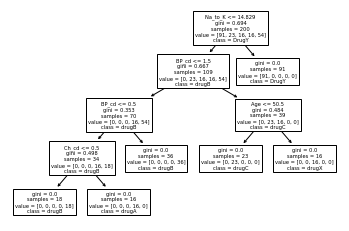

In [50]:
plot_tree(dt, feature_names=x_var,class_names=Q3.Drug.unique())

In [51]:
export_text(dt, feature_names=x_var, decimals=3)   # decimals : 자릿수

'|--- Na_to_K <= 14.829\n|   |--- BP_cd <= 1.500\n|   |   |--- BP_cd <= 0.500\n|   |   |   |--- Ch_cd <= 0.500\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Ch_cd >  0.500\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.500\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.500\n|   |   |--- Age <= 50.500\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.500\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.829\n|   |--- class: DrugY\n'

#### 정답 : ***Na_to_K, 14.829***

## 문제 03 유형(DataSet_03.csv 이용)

## 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을 파악하는 것이 가능할 지를 연구하고자 한다.

In [52]:
import pandas as pd
import numpy as np

In [53]:
dataset3 = pd.read_csv('DataSet/DataSet_03.csv')

dataset3

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


### 1. 이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로 정의할 때, 이상치에 해당하는 데이터는 몇 개인가?<br>(답안 예시) 10

In [54]:
Q1 = dataset3.copy()
Q1['forehead_ratio'] = Q1['forehead_width_cm'] / Q1['forehead_height_cm']

Q1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio
0,1,11.8,6.1,1,0,1,1,Male,1.934426
1,0,14.0,5.4,0,0,1,0,Female,2.592593
2,0,11.8,6.3,1,1,1,1,Male,1.873016
3,0,14.4,6.1,0,1,1,1,Male,2.360656
4,1,13.5,5.9,0,0,0,0,Female,2.288136
...,...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female,2.666667
4997,1,11.9,5.4,0,0,0,0,Female,2.203704
4998,1,12.9,5.7,0,0,0,0,Female,2.263158
4999,1,13.2,6.2,0,0,0,0,Female,2.129032


In [55]:
mean1 = Q1['forehead_ratio'].mean()
std1 = Q1['forehead_ratio'].std()

In [56]:
LL = mean1 - 3*std1
HH = mean1 + 3*std1

In [57]:
Q1_out = Q1[(Q1['forehead_ratio']<LL) | (Q1['forehead_ratio']>HH)]   # 벡터 단위로 처리하기 위해서 or가 아닌 | 사용

Q1_out

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_ratio
1641,1,15.5,5.1,1,1,1,1,Male,3.039216
1817,1,15.5,5.1,1,0,1,1,Male,3.039216
4948,0,15.5,5.1,1,1,1,1,Male,3.039216


In [58]:
Q1_ans = len(Q1_out)
print(Q1_ans)

3


#### 정답 : ***3***

### 2. 성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.<br>- 검정은 이분산을 가정하고 수행한다.<br>- 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여 기술하시오.<br>- 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지 않을 경우 N으로 답하시오.<br>(답안 예시) 1.234, Y

In [59]:
# 이분산 가정 → 독립

In [60]:
# 독립인 두 집단 간의 평균 차이 검정

In [61]:
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel   # 독립 1표본, 독립 2표본, 대응표본

In [62]:
ttest_ind(Q1[Q1.gender=='Male'].forehead_ratio,
          Q1[Q1.gender=='Female'].forehead_ratio,
          equal_var=False)   # 이분산
          # conf_level=0.99)

Ttest_indResult(statistic=2.9994984197511543, pvalue=0.0027186702390657176)

In [63]:
# 다른 방법
ttest_ind(Q1.forehead_ratio[Q1.gender=='Male'],
          Q1.forehead_ratio[Q1.gender=='Female'],
          equal_var=False)   # 이분산
          # conf_level=0.99)

Ttest_indResult(statistic=2.9994984197511543, pvalue=0.0027186702390657176)

In [64]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# 버전 업데이트 후 유의수준 지정 불가능

#### 정답 : ***2.999, Y***

### 3. 주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여 알아보고자 한다.<br>- 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로 한다.<br>- 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 Label로 사용한다. (forehead_ratio는 사용하지 않음)<br>- 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를 평가한다. 이 때 임계값은 0.5를 사용한다.<br>- Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오.<br>(답안 예시) 0.12

In [65]:
# (참고) 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split   # random_state=123
from sklearn.metrics import classification_report, precision_score

In [67]:
Q3 = dataset3.copy()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(Q3.drop('gender', axis=1), Q3.gender, test_size=0.3, random_state=123)

In [69]:
log_reg = LogisticRegression().fit(X_train, y_train)

In [70]:
y_pred = log_reg.predict(X_test)

y_pred

array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [71]:
pred_p = log_reg.predict_proba(X_test)

pred_p

array([[2.13366044e-02, 9.78663396e-01],
       [8.97496054e-05, 9.99910250e-01],
       [2.54440411e-01, 7.45559589e-01],
       ...,
       [9.63308173e-01, 3.66918274e-02],
       [8.55088606e-05, 9.99914491e-01],
       [1.37076239e-04, 9.99862924e-01]])

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [73]:
precision_score(y_test, y_pred, pos_label='Male').round(2)   # pos_label 꼭 지정해줘야 함

0.96

In [74]:
# 임계값이 0.7이라면
(pred_p[:, 1]>0.7).sum()

735

#### 정답 : ***0.96***

## 문제 04 유형(DataSet_04.csv 이용)

## 한국인의 식생활 변화가 건강에 미치는 영향을 분석하기에 앞서 육류 소비량에 대한 분석을 하려고 한다. 확보한 데이터는 세계 각국의 1인당 육류 소비량 데이터로 아래와 같은 내용을 담고 있다.

In [75]:
import pandas as pd
import numpy as np

In [76]:
dataset4 = pd.read_csv('DataSet/DataSet_04.csv')

dataset4

,LOCATION,SUBJECT,TIME,Value
0,AUS,BEEF,1991,27.721815
1,AUS,BEEF,1992,26.199591
2,AUS,BEEF,1993,26.169094
3,AUS,BEEF,1994,25.456134
4,AUS,BEEF,1995,25.340226
...,...,...,...,...
6713,EU28,SHEEP,2022,2.012270
6714,EU28,SHEEP,2023,2.018727
6715,EU28,SHEEP,2024,2.026332
6716,EU28,SHEEP,2025,2.034105


### 1. 한국인의 1인당 육류 소비량이 해가 갈수록 증가하는 것으로 보여 상관분석을 통하여 확인하려고 한다.<br>- 데이터 파일로부터 한국 데이터만 추출한다. 한국은 KOR로 표기되어 있다.<br>- 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행하고 상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지만 기술하시오.<br>(답안 예시) 0.55

In [77]:
Q1 = dataset4[dataset4.LOCATION=='KOR']

Q1

,LOCATION,SUBJECT,TIME,Value
442,KOR,BEEF,1991,5.085481
443,KOR,BEEF,1992,5.685434
444,KOR,BEEF,1993,5.325765
445,KOR,BEEF,1994,5.698819
446,KOR,BEEF,1995,6.568429
...,...,...,...,...
583,KOR,SHEEP,2022,0.197951
584,KOR,SHEEP,2023,0.199098
585,KOR,SHEEP,2024,0.200266
586,KOR,SHEEP,2025,0.201451


In [78]:
Q1_out = Q1.groupby('TIME').sum().reset_index()

Q1_out.corr().round(2)

,TIME,Value
TIME,1.00,0.96
Value,0.96,1.00


In [79]:
# 다른 풀이
Q1_pivot = pd.pivot_table(data=Q1, index='TIME',
                          values='Value',
                          aggfunc='sum')
Q1_pivot.reset_index(inplace=True)

Q1_pivot.corr()['Value']['TIME'].round(2)

0.96

#### 정답 : ***0.96***

### 2. 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교하여, 연도별 소비량에 평균 차이가 있는지 분석하고자 한다.<br>- 두 국가의 육류별 소비량을 연도기준으로 비교하는 대응표본 t 검정을 수행하시오.<br>- 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류를 모두 적으시오. (알파벳 순서)<br>(답안 예시) BEEF, PIG, POULTRY, SHEEP

In [80]:
Q2_isin = dataset4[dataset4.LOCATION.isin(['KOR', 'JPN'])]
print(len(dataset4))
print(len(Q2_isin))

6718
294


In [81]:
Q2_isin_out = pd.pivot_table(data=Q2_isin, index=['TIME', 'SUBJECT'],
                             columns=['LOCATION'],
                             values='Value')

Q2_isin_out

LOCATION            JPN        KOR
TIME SUBJECT                      
1990 BEEF      6.111035        NaN
     PIG      13.219006        NaN
     POULTRY  12.844865   5.570102
     SHEEP     0.756696   0.204153
1991 BEEF      6.517055   5.085481
...                 ...        ...
2025 SHEEP     0.125060   0.201451
2026 BEEF      6.844875  10.737425
     PIG      15.544018  29.544063
     POULTRY  14.768340  17.907865
     SHEEP     0.122136   0.202656

[148 rows x 2 columns]

In [82]:
Q2_isin_out = Q2_isin_out.dropna().reset_index()

Q2_isin_out

LOCATION,TIME,SUBJECT,JPN,KOR
0,1990,POULTRY,12.844865,5.570102
1,1990,SHEEP,0.756696,0.204153
2,1991,BEEF,6.517055,5.085481
3,1991,PIG,13.239267,9.930182
4,1991,POULTRY,12.055422,6.738203
...,...,...,...,...
141,2025,SHEEP,0.125060,0.201451
142,2026,BEEF,6.844875,10.737425
143,2026,PIG,15.544018,29.544063
144,2026,POULTRY,14.768340,17.907865


In [83]:
sub_list = Q2_isin_out.SUBJECT.unique()

sub_list

array(['POULTRY', 'SHEEP', 'BEEF', 'PIG'], dtype=object)

In [84]:
from scipy.stats import ttest_rel

Q2_isin_out2 = []
for i in sub_list:
    temp = Q2_isin_out[Q2_isin_out.SUBJECT==i]
    pvalue = ttest_rel(temp['KOR'], temp['JPN']).pvalue
    Q2_isin_out2 = Q2_isin_out2 + [[i, pvalue]]

Q2_isin_out2 = pd.DataFrame(Q2_isin_out2, columns=['SUBJECT', 'pvalue'])

Q2_isin_out2

,SUBJECT,pvalue
0,POULTRY,4.690626e-01
1,SHEEP,4.346643e-05
2,BEEF,3.541916e-04
3,PIG,1.063500e-10


In [85]:
Q2_isin_out2[Q2_isin_out2.pvalue>=0.05]
# 차이가 없다는 말은 귀무가설을 채택하겠다는 의미이므로
# pvalue가 

,SUBJECT,pvalue
0,POULTRY,0.469063


#### 정답 : ***POULTRY***

### 3. (한국만 포함한 데이터에서) Time을 독립변수로, Value를 종속변수로 하여 육류 종류(SUBJECT) 별로 회귀분석을 수행하였을 때, 가장 높은 결정계수를 가진 모델의 학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지 기술하시오.<br>(답안 예시) 21.12<br>(MAPE : Mean Absolute Percentage Error, 평균 절대 백분율 오차)<br>(MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))

In [86]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from sklearn.metrics import r2_score, mean_absolute_error   # 결정계수

In [87]:
Q2_isin_out

LOCATION,TIME,SUBJECT,JPN,KOR
0,1990,POULTRY,12.844865,5.570102
1,1990,SHEEP,0.756696,0.204153
2,1991,BEEF,6.517055,5.085481
3,1991,PIG,13.239267,9.930182
4,1991,POULTRY,12.055422,6.738203
...,...,...,...,...
141,2025,SHEEP,0.125060,0.201451
142,2026,BEEF,6.844875,10.737425
143,2026,PIG,15.544018,29.544063
144,2026,POULTRY,14.768340,17.907865


In [88]:
Q3 = Q2_isin_out.drop('JPN', axis=1)

Q3

LOCATION,TIME,SUBJECT,KOR
0,1990,POULTRY,5.570102
1,1990,SHEEP,0.204153
2,1991,BEEF,5.085481
3,1991,PIG,9.930182
4,1991,POULTRY,6.738203
...,...,...,...
141,2025,SHEEP,0.201451
142,2026,BEEF,10.737425
143,2026,PIG,29.544063
144,2026,POULTRY,17.907865


In [89]:
print(Q3['TIME'].shape)
print(Q3[['TIME']].shape)

(146,)
(146, 1)


In [90]:
Q3_out = []
sub_list = Q2_isin_out.SUBJECT.unique()
for i in sub_list:
    temp = Q3[Q3.SUBJECT==i]
    lm = LinearRegression().fit(temp[['TIME']], temp.KOR)   # X는 2차원 구조로 입력
    r2_score = lm.score(temp[['TIME']], temp.KOR)
    Q3_out = Q3_out + [[i, r2_score]]
Q3_out = pd.DataFrame(Q3_out, columns=['SUBJECT', 'r2_score'])
    
Q3_out

,SUBJECT,r2_score
0,POULTRY,0.951498
1,SHEEP,0.004083
2,BEEF,0.835456
3,PIG,0.940681


In [91]:
temp = Q3[Q3.SUBJECT=='POULTRY']
lm2 = LinearRegression().fit(temp[['TIME']], temp.KOR)   # X 2차원 구조로 입력
pred = lm2.predict(temp[['TIME']])

# MAPE = Σ ( | y - y ̂ | / y ) * 100/n )
mape = ((abs(temp.KOR - pred) / temp.KOR).sum() * 100/len(temp)).round(2)

mape

5.78

#### 정답 : ***5.78***

In [92]:
##### 확장 #####

In [93]:
Q3_out = []
sub_list = Q2_isin_out.SUBJECT.unique()
for i in sub_list:
    temp = Q3[Q3.SUBJECT==i]
    globals()['lm_' + str(i)] = LinearRegression().fit(temp[['TIME']], temp.KOR)   # ★global()
    r2_score = eval('lm_' + str(i)).score(temp[['TIME']], temp.KOR)                # eval()
    Q3_out = Q3_out + [[i, r2_score]]
Q3_out = pd.DataFrame(Q3_out, columns=['SUBJECT', 'r2_score'])
    
Q3_out

,SUBJECT,r2_score
0,POULTRY,0.951498
1,SHEEP,0.004083
2,BEEF,0.835456
3,PIG,0.940681


In [94]:
print(lm_PIG.coef_)
print(lm_BEEF.coef_)
print(lm_SHEEP.coef_)
print(lm_POULTRY.coef_)

[0.55942423]
[0.15460291]
[-0.00032579]
[0.35366152]


In [95]:
temp = Q3[Q3.SUBJECT=='POULTRY']
lm_POULTRY.predict(temp[['TIME']])

array([ 6.26883255,  6.62249408,  6.9761556 ,  7.32981712,  7.68347865,
        8.03714017,  8.39080169,  8.74446322,  9.09812474,  9.45178627,
        9.80544779, 10.15910931, 10.51277084, 10.86643236, 11.22009389,
       11.57375541, 11.92741693, 12.28107846, 12.63473998, 12.98840151,
       13.34206303, 13.69572455, 14.04938608, 14.4030476 , 14.75670912,
       15.11037065, 15.46403217, 15.8176937 , 16.17135522, 16.52501674,
       16.87867827, 17.23233979, 17.58600132, 17.93966284, 18.29332436,
       18.64698589, 19.00064741])

In [96]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import pandas as pd\n# pandas, scipy, numpy, sklearn, statsmodels',
  "data = pd.read_csv('DataSet/DataSet_01.csv')\n\ndata",
  'data.columns',
  'data.isna().sum().sum()         # 열별 결측치 수 확인',
  '# 다른 방법\ndata.isna().sum(axis=1).sum()   # 행별 결측치 수 확인',
  'data.isna().any(axis=1).sum()',
  "# 데이터 종류 수치형\nQ2 = data[['TV', 'Radio', 'Social_Media', 'Sales']].corr().round(4)\n\nQ2",
  "Q2_abs = Q2.abs()   # 음수 고려할 경우\n\nQ2_abs['Sales'].nlargest(2)[1]",
  "# 다른 방법\nQ2_abs['Sales'].sort_values(ascending=False)[1]",
  'from sklearn.linear_model import LinearRegression\nfrom statsmodels.api import OLS, add_constant   # add_condtant : 상수항 별도로 추가\nfrom statsmodels.formula.api import ols         # R 기반을 그대로 사용할 수 있도록',
 

## 문제 05 유형(DataSet_05.csv 이용)

## A자동차 회사는 신규 진입하는 시장에 기존 모델을 판매하기 위한 마케팅 전략을 세우려고 한다. 기존 시장과 고객 특성이 유사하다는 전제 하에 기존 고객을 세분화하여 각 그룹의 특징을 파악하고, 이를 이용하여 신규 진입 시장의 마케팅 계획을 수립하고자 한다. 다음은 기존 시장 고객에 대한 데이터이다.

In [97]:
import pandas as pd

In [98]:
dataset5 = pd.read_csv('DataSet/DataSet_05.csv',
                       na_values=['NA', '?', '', ' '])   # 결측치 지정

dataset5

,ID,Age,Age_gr,Gender,Work_Experience,Family_Size,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,462809,22,30,1,1.0,4.0,1,1,6,2,4,NaN
1,462643,38,40,0,NaN,3.0,2,2,3,0,4,A
2,466315,67,70,0,1.0,1.0,2,2,3,2,6,NaN
3,461735,67,70,1,0.0,2.0,2,2,8,1,6,B
4,462669,40,40,0,NaN,6.0,2,2,4,1,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,30,1,0.0,7.0,1,1,0,2,1,D
8064,464685,35,40,1,3.0,4.0,1,1,5,2,4,D
8065,465406,33,40,0,1.0,1.0,1,2,6,2,6,D
8066,467299,27,30,0,1.0,4.0,1,2,6,2,6,B


In [99]:
dataset5.columns

Index(['ID', 'Age', 'Age_gr', 'Gender', 'Work_Experience', 'Family_Size',
       'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1',
       'Segmentation'],
      dtype='object')

In [100]:
dataset5.dtypes

ID                   int64
Age                  int64
Age_gr               int64
Gender               int64
Work_Experience    float64
Family_Size        float64
Ever_Married         int64
Graduated            int64
Profession           int64
Spending_Score       int64
Var_1                int64
Segmentation        object
dtype: object

In [101]:
dataset5.shape

(8068, 12)

In [102]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Age              8068 non-null   int64  
 2   Age_gr           8068 non-null   int64  
 3   Gender           8068 non-null   int64  
 4   Work_Experience  7239 non-null   float64
 5   Family_Size      7733 non-null   float64
 6   Ever_Married     8068 non-null   int64  
 7   Graduated        8068 non-null   int64  
 8   Profession       8068 non-null   int64  
 9   Spending_Score   8068 non-null   int64  
 10  Var_1            8068 non-null   int64  
 11  Segmentation     8066 non-null   object 
dtypes: float64(2), int64(9), object(1)
memory usage: 756.5+ KB


### 1. 위의 표에 표시된 데이터 타입에 맞도록 전처리를 수행하였을 때, 데이터 파일 내에 존재하는 결측값은 모두 몇 개인가? 숫자형 데이터와 문자열 데이터의 결측값을 모두 더하여 답하시오. (String 타입 변수의 경우 White Space(Blank)를 결측으로 처리한다)<br>(답안 예시) 123

In [103]:
dataset5.isna().sum().sum()

1166

#### 정답 : ***1166***

### 2. 이어지는 분석을 위해 결측값을 모두 삭제한다. 그리고, 성별이 세분화(Segmentation)에 영향을 미치는지 독립성 검정을 수행한다. 수행 결과, p-value를 반올림하여 소수점 넷째 자리까지 쓰고, 귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오.<br>(답안 예시) 0.2345, N

In [104]:
Q2 = dataset5.dropna()

print(len(dataset5))
print(len(Q2))
Q2.shape

8068
6967


(6967, 12)

In [105]:
# Chi-Squared 검정을 위해 빈도표 만들기
Q2_tab = pd.crosstab(index=Q2.Gender,
                     columns=Q2.Segmentation)

Q2_tab

Segmentation,A,B,C,D
Gender,,,,
0,784,759,826,772
1,909,872,953,1092


In [106]:
import scipy.stats as sc

In [107]:
Q2_out = sc.chi2_contingency(Q2_tab)

Q2_out[1].round(4)

0.0031

#### 정답 : ***0.0031, Y***

### 3. Segmentation 값이 A 또는 D인 데이터만 사용하여 의사결정 나무 기법으로 분류 정확도를 측정해 본다.<br>- 결측치가 포함된 행은 제거한 후 진행하시오.<br>- Train대 Test 7대3으로 데이터를 분리한다. (Seed = 123)<br>- Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를 수행한다.<br>- 의사결정나무 학습 시, 다음과 같이 설정하시오:<br>• Feature: Age_gr, Gender, Work_Experience, Family_Size, Ever_Married, Graduated, Spending_Score<br>• Label : Segmentation<br>• Parameter : Gini / Max Depth = 7 / Seed = 123<br>이 때 전체 정확도(Accuracy)를 소수점 셋째 자리 이하는 버리고 소수점 둘째 자리까지 기술하시오.<br>(답안 예시) 0.12

In [108]:
Q3 = Q2[Q2.Segmentation.isin(['A', 'D'])]

print(len(Q2))
print(len(Q3))

6967
3557


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [110]:
train, test = train_test_split(Q3,
                               test_size=0.3,
                               random_state=123)

In [111]:
train.columns

Index(['ID', 'Age', 'Age_gr', 'Gender', 'Work_Experience', 'Family_Size',
       'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1',
       'Segmentation'],
      dtype='object')

In [112]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=123)

In [113]:
x_var=['Age_gr', 'Gender', 'Work_Experience', 'Family_Size', 'Ever_Married', 'Graduated', 'Spending_Score']

In [114]:
dt.fit(train[x_var], train.Segmentation)

DecisionTreeClassifier(max_depth=7, random_state=123)

In [115]:
pred = dt.predict(test[x_var])

pred

array(['A', 'A', 'D', ..., 'A', 'A', 'A'], dtype=object)

In [116]:
dt.score(test[x_var], test.Segmentation).round(2)   # 정확도

0.68

#### 정답 : ***0.68***